<a href="https://colab.research.google.com/github/Zijian02/Summative-python/blob/main/summative_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part A: Data Preparation**

In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Load the dataset
df = pd.read_csv("loans_dataset.csv")

# Report the number of observations before cleaning
initial_obs = df.shape[0]

In [ ]:
# Filter the dataset to retain only the required variables
vars_to_keep = [
    "interest_rate", "verified_income", "debt_to_income",
    "total_credit_utilized", "total_credit_limit",
    "public_record_bankrupt", "loan_purpose", "term",
    "inquiries_last_12m", "issue_month", "annual_income",
    "loan_amount", "grade", "emp_length", "homeownership"
]
df_selected = df[vars_to_keep].copy()

# Drop observations with missing values in these variables (data cleaning)
df_cleaned = df_selected.dropna().copy()

# Rename 'inquiries_last_12m' to 'credit_checks'
df_cleaned.rename(columns={'inquiries_last_12m': 'credit_checks'}, inplace=True)

In [ ]:
# Report the number of observations after cleaning
cleaned_obs = df_cleaned.shape[0]
print(f"Number of observations before cleaning: {initial_obs}")
print(f"Number of observations after cleaning: {cleaned_obs}")

Number of observations before cleaning: 10000
Number of observations after cleaning: 9182


In [ ]:
# Summary statistics of the cleaned dataset
summary_stats = df_cleaned.describe().T
print("\nSummary statistics of cleaned dataset:")
print(tabulate(summary_stats, headers='keys', tablefmt='psql'))


Summary statistics of cleaned dataset:
+------------------------+---------+---------------+---------------+---------+------------+-----------+-----------+------------------+
|                        |   count |          mean |           std |     min |        25% |       50% |       75% |              max |
|------------------------+---------+---------------+---------------+---------+------------+-----------+-----------+------------------|
| interest_rate          |    9182 |     12.4049   |      5.00441  |    5.31 |     9.43   |     11.98 |     15.05 |     30.94        |
| debt_to_income         |    9182 |     18.9867   |     14.1946   |    0    |    11.0125 |     17.43 |     24.76 |    469.09        |
| total_credit_utilized  |    9182 |  53007.8      |  54830.2      |    0    | 20481.2    |  38482    |  67719.8  | 942456           |
| total_credit_limit     |    9182 | 188726        | 190547        |    0    | 53668.5    | 120148    | 273738    |      3.38603e+06 |
| public_record

# **Part B: Exploratory Data Analysis (EDA)**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [ ]:
print("\n Descriptive Statistics ")
print(df_cleaned.describe())


 Descriptive Statistics 
       interest_rate  debt_to_income  total_credit_utilized  \
count    9182.000000     9182.000000            9182.000000   
mean       12.404904       18.986717           53007.828687   
std         5.004405       14.194584           54830.205068   
min         5.310000        0.000000               0.000000   
25%         9.430000       11.012500           20481.250000   
50%        11.980000       17.430000           38482.000000   
75%        15.050000       24.760000           67719.750000   
max        30.940000      469.090000          942456.000000   

       total_credit_limit  public_record_bankrupt         term  credit_checks  \
count        9.182000e+03             9182.000000  9182.000000    9182.000000   
mean         1.887259e+05                0.117948    43.399695       1.982901   
std          1.905468e+05                0.328917    11.083798       2.383235   
min          0.000000e+00                0.000000    36.000000       0.000000   
2

In [ ]:
# Descriptive statistics for selected variables
stats_vars = ['interest_rate', 'annual_income', 'debt_to_income', 'loan_amount']
desc_stats = df_cleaned[stats_vars].agg(['mean', 'median', 'std', 'min', 'max']).T
desc_stats = desc_stats.round(2)
print("\nDescriptive Statistics:")
print(desc_stats)


Descriptive Statistics:
                    mean    median       std      min         max
interest_rate      12.40     11.98      5.00     5.31       30.94
annual_income   82188.34  68000.00  65910.19  3000.00  2300000.00
debt_to_income     18.99     17.43     14.19     0.00      469.09
loan_amount     16644.51  15000.00  10349.62  1000.00    40000.00


In [ ]:
# Count unique values and frequencies for specified variables
cat_vals = ['grade', 'verified_income', 'homeownership']

for cat in cat_vals:
  unique_vals = df_cleaned[cat].nunique()
  freq = df_cleaned[cat].value_counts()
  print(f"\n{cat.capitalize()} - Unique values: {unique_vals}")
  print(freq.to_string())


Grade - Unique values: 7
grade
B    2793
C    2438
A    2269
D    1311
E     304
F      56
G      11

Verified_income - Unique values: 3
verified_income
Source Verified    3941
Not Verified       3270
Verified           1971

Homeownership - Unique values: 3
homeownership
MORTGAGE    4464
RENT        3590
OWN         1128


***Visualization***

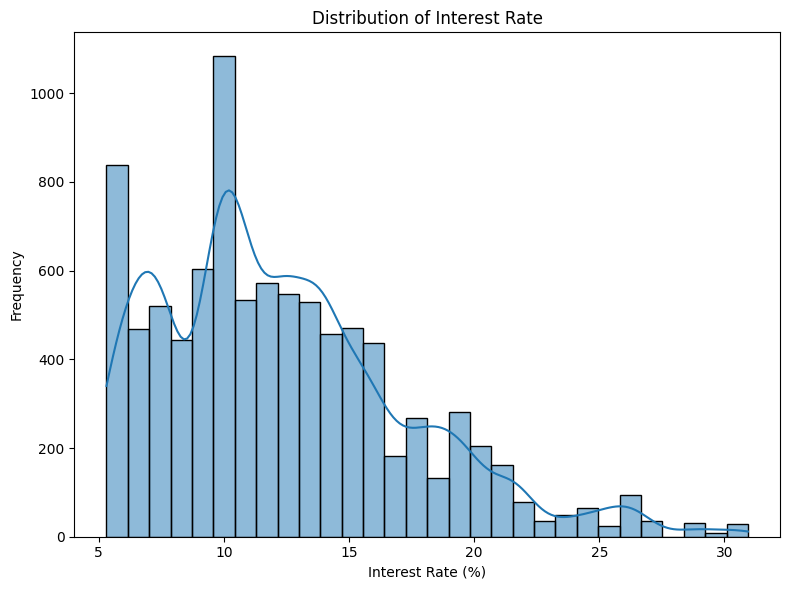

In [ ]:
# Histograms for interest rate
plt.figure(figsize=(8,6))
sns.histplot(df_cleaned['interest_rate'], kde=True, bins=30)
plt.title("Distribution of Interest Rate")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("interest_rate_histogram.png")
plt.show()

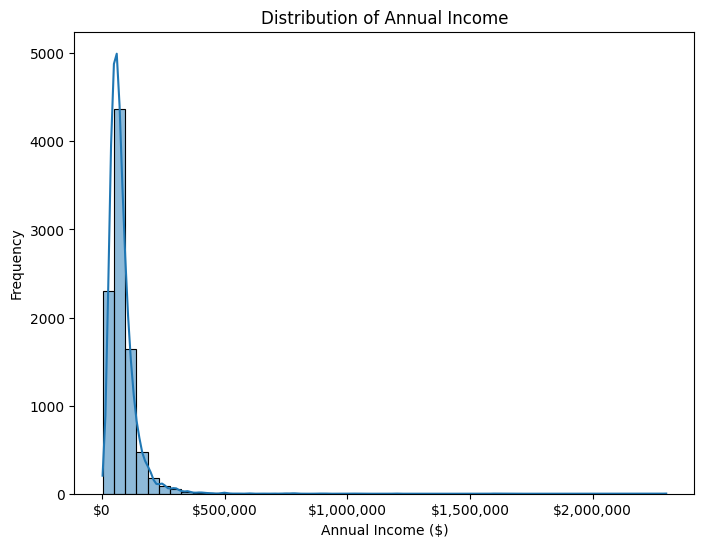

In [ ]:
# Histogram for annual income
plt.figure(figsize=(8,6))
sns.histplot(df_cleaned['annual_income'], kde=True, bins=50)
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income ($)")
plt.ylabel("Frequency")
def dollar_formatter(x, pos):
    return f"${int(x):,}"
    # return f"${x:,.0f}"
plt.gca().xaxis.set_major_formatter(FuncFormatter(dollar_formatter))
plt.savefig("annual_income_histogram.png")
plt.show()

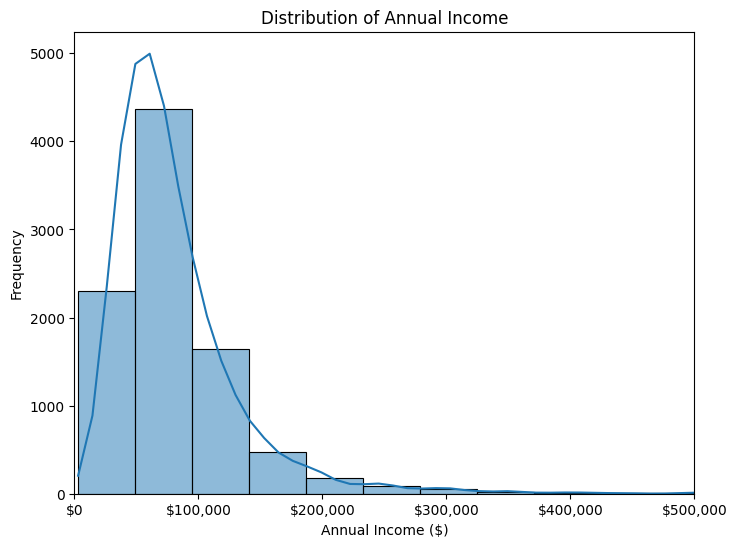

In [ ]:
# Histogram for annual income (with Annual income at $500,000 for better clarity)
plt.figure(figsize=(8,6))
sns.histplot(df_cleaned['annual_income'], kde=True, bins=50)
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income ($)")
plt.ylabel("Frequency")
def dollar_formatter(x, pos):
    return f"${int(x):,}"
    # return f"${x:,.0f}"
plt.gca().xaxis.set_major_formatter(FuncFormatter(dollar_formatter))
plt.xlim(0, 500000)
plt.savefig("annual_income_histogram.png")
plt.show()

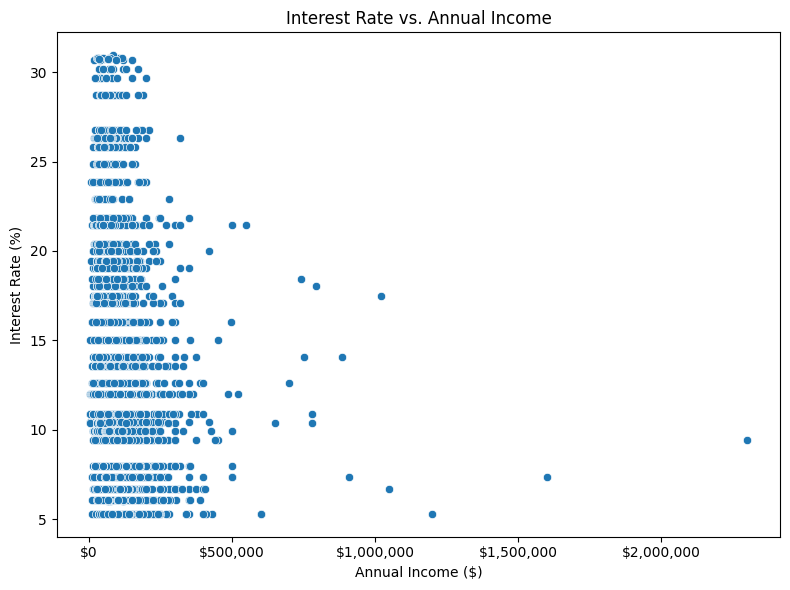

In [ ]:
# Scatterplot of interest rate vs annual income

plt.figure(figsize=(8,6))
sns.scatterplot(x='annual_income', y='interest_rate', data=df_cleaned)
plt.title("Interest Rate vs. Annual Income")
plt.xlabel("Annual Income ($)")
plt.ylabel("Interest Rate (%)")
def dollar_formatter(x, pos):
    return f"${int(x):,}"
    # return f"${x:,.0f}"
plt.gca().xaxis.set_major_formatter(FuncFormatter(dollar_formatter))
plt.tight_layout()
plt.savefig("scatter_interest_vs_income.png")
plt.show()

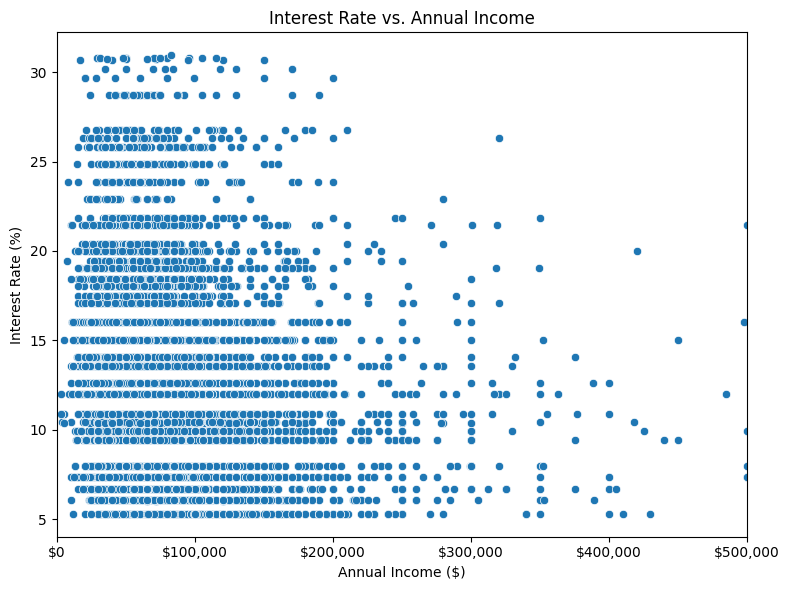

In [ ]:
# Scatterplot of interest rate vs annual income (with Annual income $500,000 for better clarity)

plt.figure(figsize=(8,6))
sns.scatterplot(x='annual_income', y='interest_rate', data=df_cleaned)
plt.title("Interest Rate vs. Annual Income")
plt.xlabel("Annual Income ($)")
plt.ylabel("Interest Rate (%)")
def dollar_formatter(x, pos):
    return f"${int(x):,}"
    # return f"${x:,.0f}"
plt.gca().xaxis.set_major_formatter(FuncFormatter(dollar_formatter))
plt.xlim(0, 500000)
plt.tight_layout()
plt.savefig("scatter_interest_vs_income.png")
plt.show()

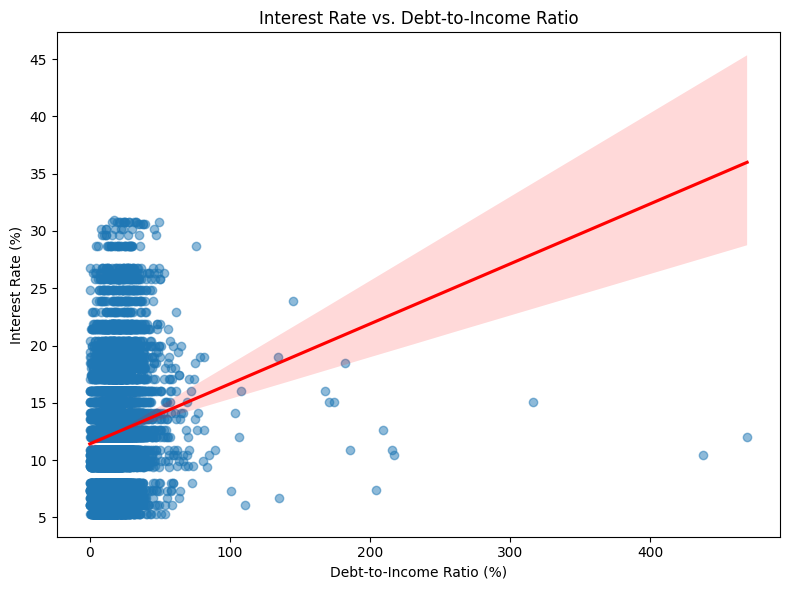

In [ ]:
# Scatterplot for interest rate vs debt to income

plt.figure(figsize=(8,6))
sns.regplot(
    x='debt_to_income',
    y='interest_rate',
    data=df_cleaned,
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
    )
plt.title("Interest Rate vs. Debt-to-Income Ratio")
plt.xlabel("Debt-to-Income Ratio (%)")
plt.ylabel("Interest Rate (%)")
plt.tight_layout()
plt.savefig("scatter_interest_vs_dti.png")
plt.show()

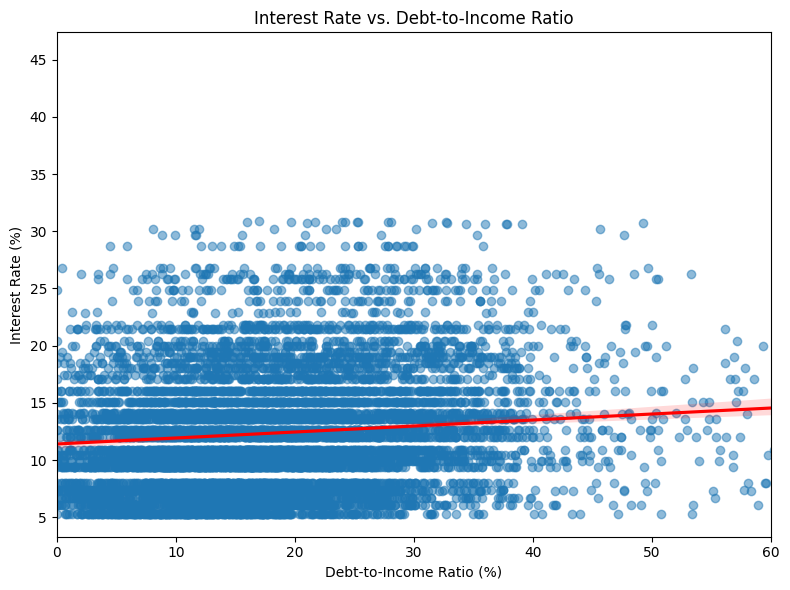

In [ ]:
# Scatterplot for interest rate vs debt to income (With 60% Debt to income ratio for better clarity)

plt.figure(figsize=(8,6))
sns.regplot(
    x='debt_to_income',
    y='interest_rate',
    data=df_cleaned,
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
    )
plt.title("Interest Rate vs. Debt-to-Income Ratio")
plt.xlabel("Debt-to-Income Ratio (%)")
plt.ylabel("Interest Rate (%)")
plt.xlim(0, 60)
plt.tight_layout()
plt.savefig("scatter_interest_vs_dti.png")
plt.show()

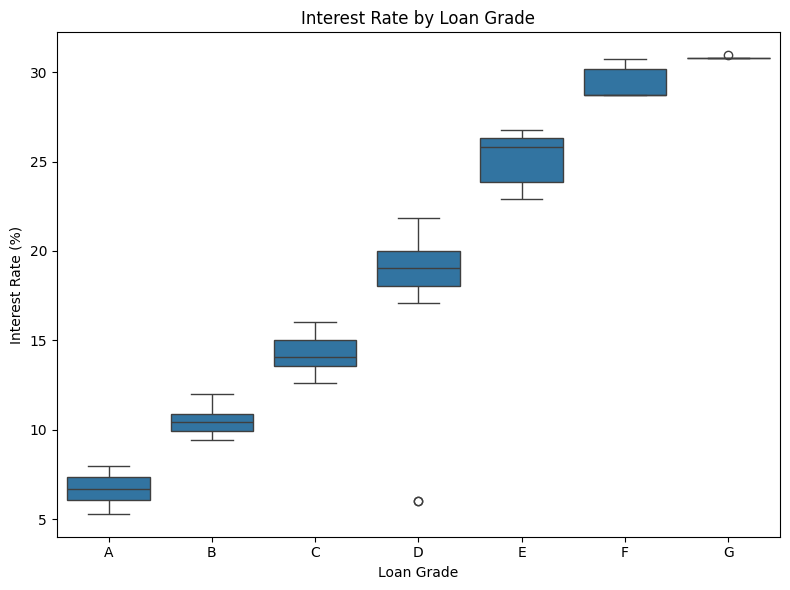

In [ ]:
# Boxplot of interest by grade

plt.figure(figsize=(8,6))
sns.boxplot(x='grade', y='interest_rate', data=df_cleaned,
            order=sorted(df_cleaned['grade'].unique()))
plt.title("Interest Rate by Loan Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Interest Rate (%)")
plt.tight_layout()
plt.savefig("boxplot_interest_by_grade.png")
plt.show()

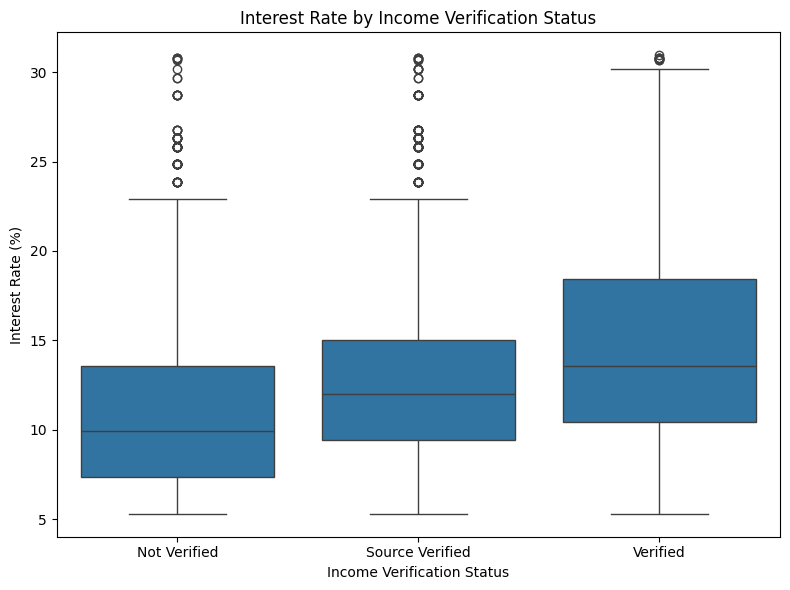

In [ ]:
# Boxplot of interest rate by verified income

plt.figure(figsize=(8,6))
sns.boxplot(x='verified_income', y='interest_rate', data=df_cleaned,
            order=['Not Verified', 'Source Verified', 'Verified'])
plt.title("Interest Rate by Income Verification Status")
plt.xlabel("Income Verification Status")
plt.ylabel("Interest Rate (%)")
plt.tight_layout()
plt.savefig("boxplot_interest_by_verified_income.png")
plt.show()

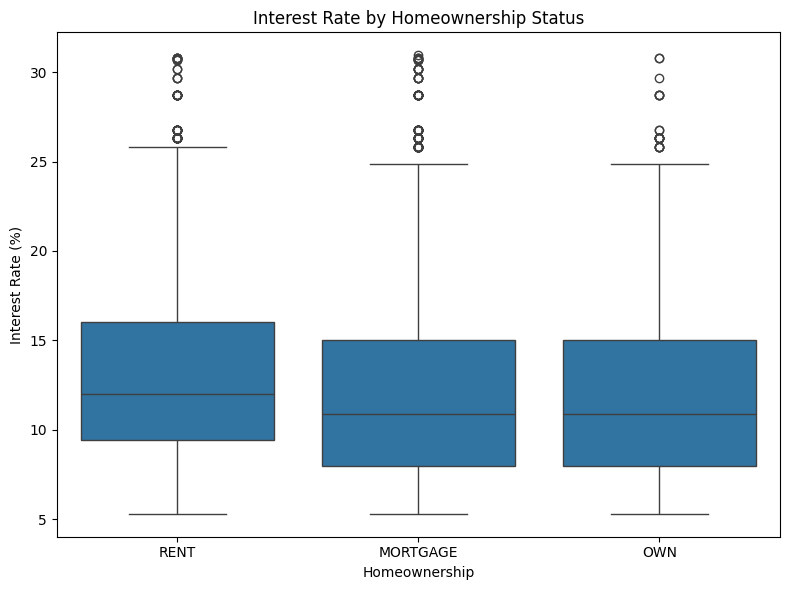

In [ ]:
# Boxplot of interest rate by homeownership

plt.figure(figsize=(8,6))
sns.boxplot(x='homeownership', y='interest_rate', data=df_cleaned,
            order=['RENT', 'MORTGAGE', 'OWN'])
plt.title("Interest Rate by Homeownership Status")
plt.xlabel("Homeownership")
plt.ylabel("Interest Rate (%)")
plt.tight_layout()
plt.savefig("boxplot_interest_by_homeownership.png")
plt.show()

***Derived Variables***

In [ ]:
# Create derived variables:
# credit_util = total_credit_utilized / total_credit_limit (0 if total_credit_limit is 0)
df_cleaned['credit_util'] = np.where(df_cleaned['total_credit_limit'] == 0, 0,
                                     df_cleaned['total_credit_utilized'] / df_cleaned['total_credit_limit'])
# bankruptcy_dummy = 1 if public_record_bankrupt >= 1, else 0
df_cleaned['bankruptcy_dummy'] = (df_cleaned['public_record_bankrupt'] >= 1).astype(int)

In [ ]:
# Report mean and proportion of non-zero values for the derived variables
mean_credit_util = df_cleaned['credit_util'].mean()
prop_credit_util_nonzero = (df_cleaned['credit_util'] > 0).mean()
mean_bankrupt_dummy = df_cleaned['bankruptcy_dummy'].mean()
prop_bankrupt_nonzero = (df_cleaned['bankruptcy_dummy'] > 0).mean()
print("\nDerived Variables:")
print(f"Average credit utilization: {mean_credit_util:.3f}")
print(f"Proportion of non-zero credit utilization: {prop_credit_util_nonzero:.3f}")
print(f"Average bankruptcy dummy: {mean_bankrupt_dummy:.3f}")
print(f"Proportion of bankruptcies (public_record_bankrupt >= 1): {prop_bankrupt_nonzero:.3f}")


Derived Variables:
Average credit utilization: 0.407
Proportion of non-zero credit utilization: 0.998
Average bankruptcy dummy: 0.116
Proportion of bankruptcies (public_record_bankrupt >= 1): 0.116


# **Part C: Regression Analysis**

In [ ]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [ ]:
# Model 1: Simple Linear Regression (interest_rate ~ debt_to_income)
X1 = sm.add_constant(df_cleaned['debt_to_income'])
model1 = sm.OLS(df_cleaned['interest_rate'], X1).fit()
print("\nModel 1 Summary:")
print(model1.summary())


Model 1 Summary:
                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     207.5
Date:                Thu, 22 May 2025   Prob (F-statistic):           1.56e-46
Time:                        12:03:31   Log-Likelihood:                -27712.
No. Observations:                9182   AIC:                         5.543e+04
Df Residuals:                    9180   BIC:                         5.544e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.4097 

In [ ]:
# Model 2: Simple Linear Regression (interest_rate ~ bankruptcy_dummy)
X2 = sm.add_constant(df_cleaned['bankruptcy_dummy'])
model2 = sm.OLS(df_cleaned['interest_rate'], X2).fit()
print("\nModel 2 Summary:")
print(model2.summary())


Model 2 Summary:
                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     21.93
Date:                Thu, 22 May 2025   Prob (F-statistic):           2.86e-06
Time:                        12:03:33   Log-Likelihood:                -27803.
No. Observations:                9182   AIC:                         5.561e+04
Df Residuals:                    9180   BIC:                         5.562e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12

In [ ]:
# Model 3: Regression with dummy variables for verified_income
# Create dummy variables for verified_income (Reference category: Not Verified)
verif_dummies = pd.get_dummies(df_cleaned['verified_income'], prefix='verif', drop_first=True)
X3 = sm.add_constant(verif_dummies)
X3 = X3.astype(float)
model3 = sm.OLS(df_cleaned['interest_rate'], X3).fit()
print("\nModel 3 Summary:")
print(model3.summary())


Model 3 Summary:
                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     322.1
Date:                Thu, 22 May 2025   Prob (F-statistic):          6.35e-136
Time:                        12:03:34   Log-Likelihood:                -27503.
No. Observations:                9182   AIC:                         5.501e+04
Df Residuals:                    9179   BIC:                         5.503e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const       

In [ ]:
# Compute average interest rate for borrowers with unverified income (Not Verified)
avg_int_rate_unverified = df_cleaned.loc[df_cleaned['verified_income']=="Not Verified", 'interest_rate'].mean()
print(f"\nAverage interest rate (Not Verified income): {avg_int_rate_unverified:.2f}%")


Average interest rate (Not Verified income): 11.02%


In [ ]:
# Model 4: Multiple Regression (interest_rate ~ debt_to_income + credit_util + bankruptcy_dummy)
X4 = sm.add_constant(df_cleaned[['debt_to_income', 'credit_util', 'bankruptcy_dummy']])
model4 = sm.OLS(df_cleaned['interest_rate'], X4).fit()
print("\nModel 4 Summary:")
print(model4.summary())


Model 4 Summary:
                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     267.7
Date:                Thu, 22 May 2025   Prob (F-statistic):          1.38e-166
Time:                        12:03:37   Log-Likelihood:                -27429.
No. Observations:                9182   AIC:                         5.487e+04
Df Residuals:                    9178   BIC:                         5.489e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9

In [ ]:
# Model 5: Enhanced multiple regression with additional predictors
# Include variables from Model 4 plus: annual_income, loan_amount, term (dummy), grade (dummies),
# emp_length, homeownership (dummies), loan_purpose (dummies), credit_checks.
# Create dummy variables for categorical predictors (specify reference categories):
df_cleaned['term_60'] = (df_cleaned['term'] == 60).astype(int)  # term dummy (1 for 60-month term, 0 for 36-month term as reference)
grade_dummies = pd.get_dummies(df_cleaned['grade'], prefix='grade', drop_first=True)        # reference: Grade A
home_dummies = pd.get_dummies(df_cleaned['homeownership'], prefix='home', drop_first=True)  # reference: MORTGAGE
purpose_dummies = pd.get_dummies(df_cleaned['loan_purpose'], prefix='purpose', drop_first=False)
# Use "debt_consolidation" as reference for loan_purpose by dropping its dummy
if 'purpose_debt_consolidation' in purpose_dummies.columns:
    purpose_dummies.drop('purpose_debt_consolidation', axis=1, inplace=True)

# Assemble the feature for Model 5
X5 = pd.concat([
    df_cleaned[['debt_to_income', 'credit_util', 'bankruptcy_dummy',
                'annual_income', 'loan_amount', 'emp_length', 'credit_checks', 'term_60']],
    grade_dummies, home_dummies, purpose_dummies
], axis=1)
X5 = sm.add_constant(X5)
X5 = X5.astype(float)
model5 = sm.OLS(df_cleaned['interest_rate'], X5).fit()
print("\nModel 5 Summary:")
print(model5.summary())


Model 5 Summary:
                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     6723.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        12:03:38   Log-Likelihood:                -13874.
No. Observations:                9182   AIC:                         2.780e+04
Df Residuals:                    9154   BIC:                         2.800e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const 

In [ ]:
# Residuals for the first five observations of Model 5
print("\nModel 5 residuals (first 5 observations):")
print(model5.resid.head(5))


Model 5 residuals (first 5 observations):
0   -0.270227
1   -1.422690
2   -2.083993
3    0.022217
4   -0.342447
dtype: float64


In [ ]:
# Present all regression results in one table
results_table = summary_col(
    [model1, model2, model3, model4, model5],
    model_names=["Model 1", "Model 2", "Model 3", "Model 4", "Model 5"],
    stars=True,
    float_format="%0.3f",
    info_dict={'N': lambda x: str(int(x.nobs)), 'F-statistic': lambda x: f"{x.fvalue:.2f}"}
)
print("\nRegression Results Summary:")
print(results_table)


Regression Results Summary:

                          Model 1   Model 2   Model 3  Model 4   Model 5 
-------------------------------------------------------------------------
const                    11.410*** 12.316*** 11.020*** 9.754*** 6.651*** 
                         (0.086)   (0.055)   (0.085)   (0.108)  (0.047)  
debt_to_income           0.052***                      0.041*** 0.003*** 
                         (0.004)                       (0.004)  (0.001)  
bankruptcy_dummy                   0.763***            0.627*** 0.024    
                                   (0.163)             (0.156)  (0.036)  
verif_Source Verified                        1.479***                    
                                             (0.114)                     
verif_Verified                               3.495***                    
                                             (0.138)                     
credit_util                                            4.419*** 0.329*** 
        